In [2]:
# 시계열 분석 연습
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [3]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
# Numpy의 polyfit으로 회귀분석하는 방법
pinkwink_web = pd.read_csv('./data/08. PinkWink Web Traffic.csv',
                          encoding='utf-8', thousands=',',
                          names = ['date','hit'], index_col = 0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766
16. 7. 2.,377
16. 7. 3.,427
16. 7. 4.,902
16. 7. 5.,850


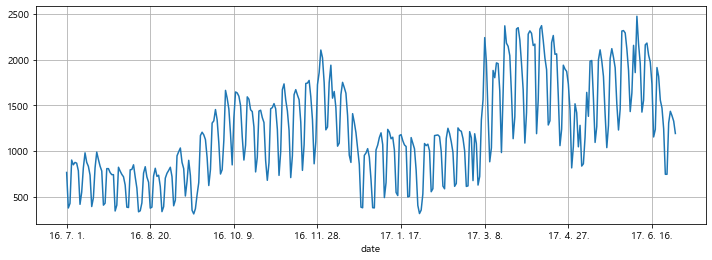

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [6]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [9]:
def error(f,x,y) :
    return np.sqrt(np.mean((f(x)-y)**2))

In [10]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


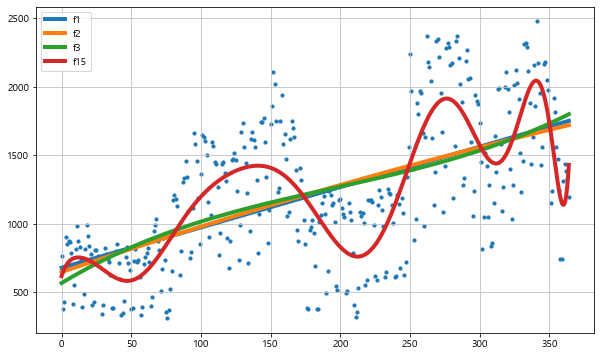

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [15]:
# Prophet 모듈을 이용해 방문자 예측하는 방법
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [18]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,689.315178,1122.049414
421,2017-08-26,497.711704,291.301061,705.144957
422,2017-08-27,630.268176,420.089710,830.921017
423,2017-08-28,1182.888299,967.210541,1391.820734
424,2017-08-29,1218.800002,1029.028480,1441.855135


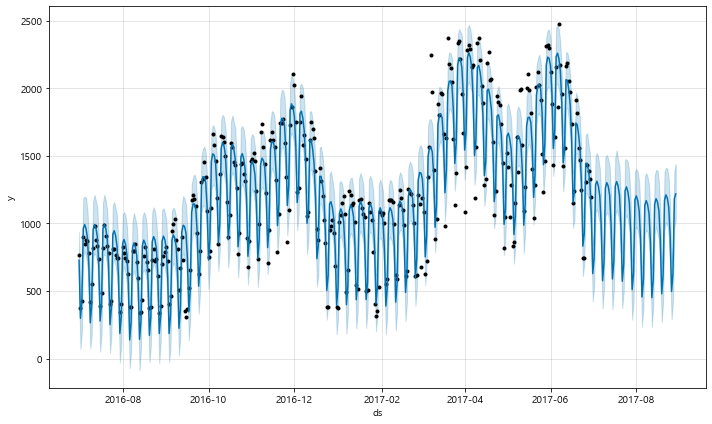

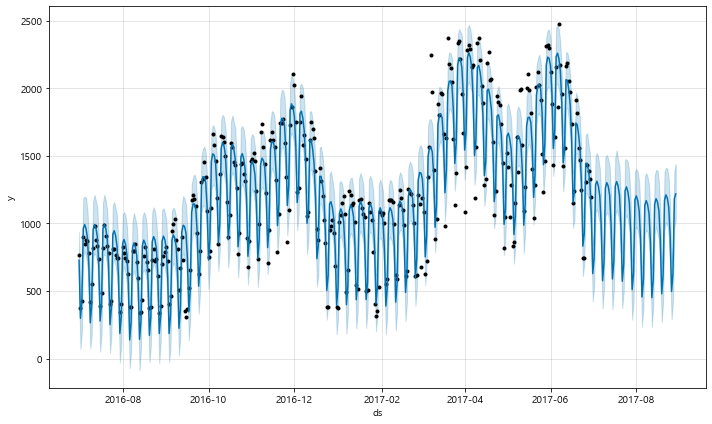

In [19]:
m.plot(forecast)

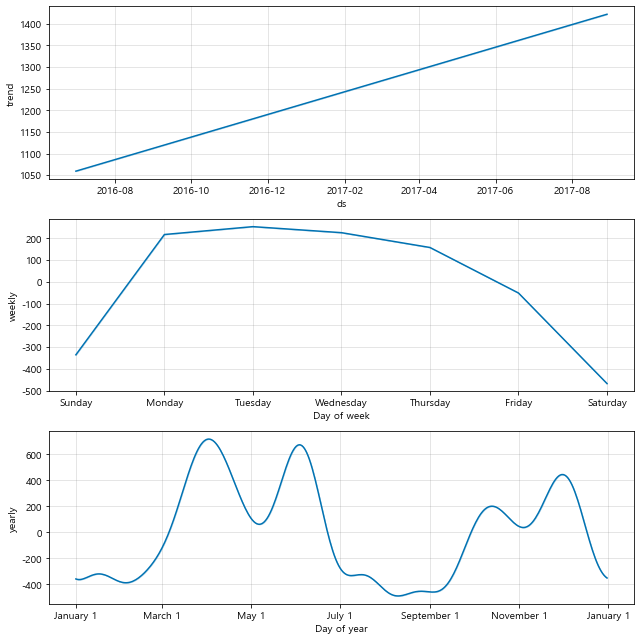

In [21]:
m.plot_components(forecast);

In [36]:
# Seasonal 시계열 분석으로 주식 분석하기
start = datetime(2007, 1, 11)
end = datetime(2021, 1, 11)

SSE = web.DataReader('005930.KS','yahoo',start,end)
SSE.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-05,83900.0,81600.0,81600.0,83900.0,35335669.0,83900.0
2021-01-06,84500.0,82100.0,83300.0,82200.0,42089013.0,82200.0
2021-01-07,84200.0,82700.0,82800.0,82900.0,32644642.0,82900.0
2021-01-08,90000.0,83000.0,83300.0,88800.0,59013307.0,88800.0
2021-01-11,96800.0,89500.0,90000.0,91000.0,89406371.0,91000.0


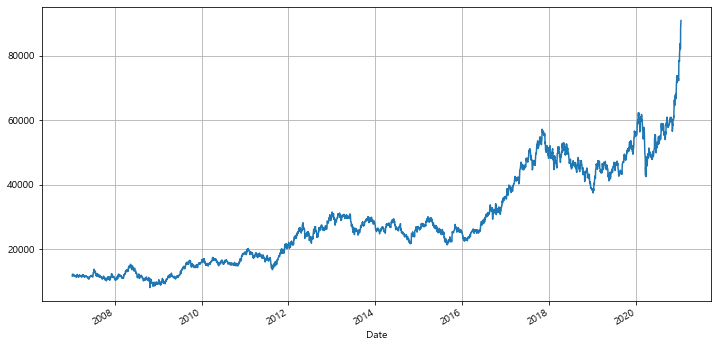

In [37]:
SSE['Close'].plot(figsize=(12,6), grid=True);

In [38]:
# 참값과 비교를 위해 일부 날짜까지만 잘라보기
SSE_trunc = SSE[:'2020-01-11']
SSE_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-11,11760.0,11560.0,11580.0,11660.0,29839350.0,9400.125977
2007-01-12,12120.0,11700.0,11800.0,12120.0,40346050.0,9770.967773
2007-01-15,12300.0,12140.0,12240.0,12240.0,33675300.0,9867.713867
2007-01-16,12300.0,12220.0,12300.0,12260.0,15522550.0,9883.835938
2007-01-17,12200.0,11940.0,12200.0,12040.0,23396700.0,9706.476562
...,...,...,...,...,...,...
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,54392.718750
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,54686.738281
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,55666.781250


In [39]:
df = pd.DataFrame({'ds':SSE_trunc.index, 'y':SSE_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2007-01-11,11660.0
1,2007-01-12,12120.0
2,2007-01-15,12240.0
3,2007-01-16,12260.0
4,2007-01-17,12040.0


In [44]:
# 예측
m = Prophet(daily_seasonality=True)
m.fit(df);

In [45]:
future = m.make_future_dataframe(periods=365) #365일 동안 예측
future.tail()

,ds
3567,2021-01-05
3568,2021-01-06
3569,2021-01-07
3570,2021-01-08
3571,2021-01-09


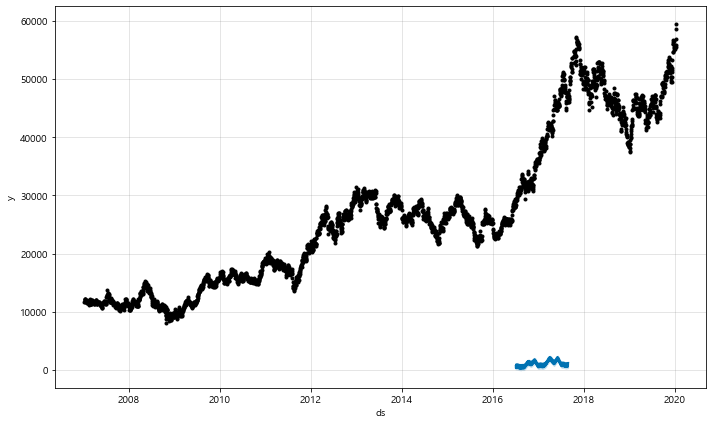

In [46]:
m.plot(forecast);

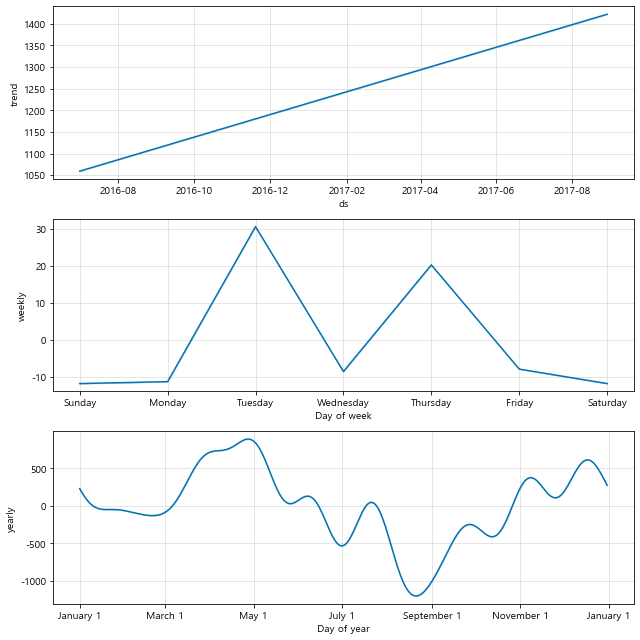

In [47]:
# 추가요소 확인
m.plot_components(forecast);

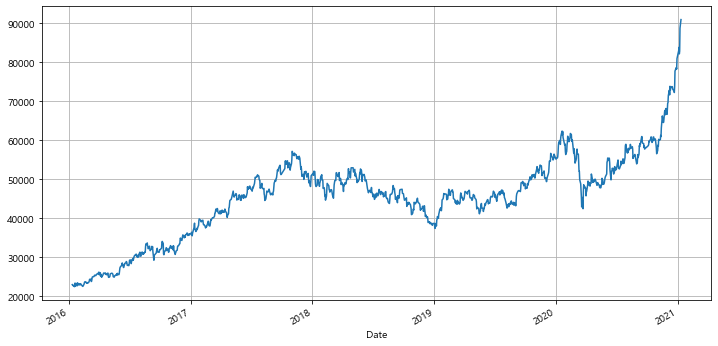

In [65]:
# 예측 바꿔보기
start = datetime(2016, 1, 11)
end = datetime(2021, 1, 11)

SSE = web.DataReader('005930.KS','yahoo',start,end)
SSE['Close'].plot(figsize=(12,6), grid = True)

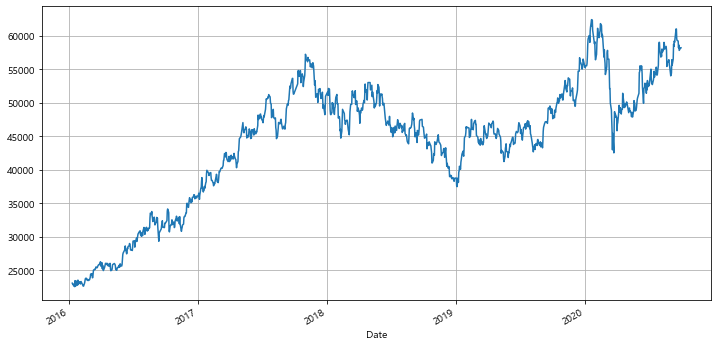

In [66]:
SSE_trunc = SSE[:'2020-09-30']
SSE_trunc['Close'].plot(figsize=(12,6), grid=True);

In [67]:
df = pd.DataFrame({'ds':SSE_trunc.index, 'y':SSE_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [68]:
m = Prophet(daily_seasonality = True)
m.fit(df);

In [69]:
future = m.make_future_dataframe(periods=104) #2020/10 부터 2021/1/11까지 데이터 예측
future.tail()

,ds
1253,2021-01-07
1254,2021-01-08
1255,2021-01-09
1256,2021-01-10
1257,2021-01-11


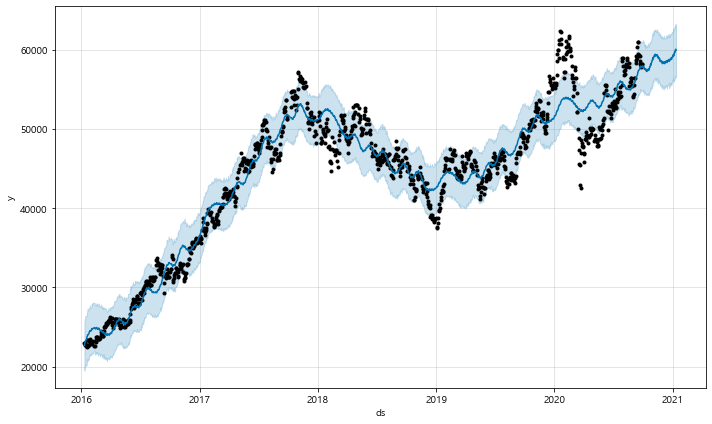

In [70]:
forecast = m.predict(future)
m.plot(forecast);

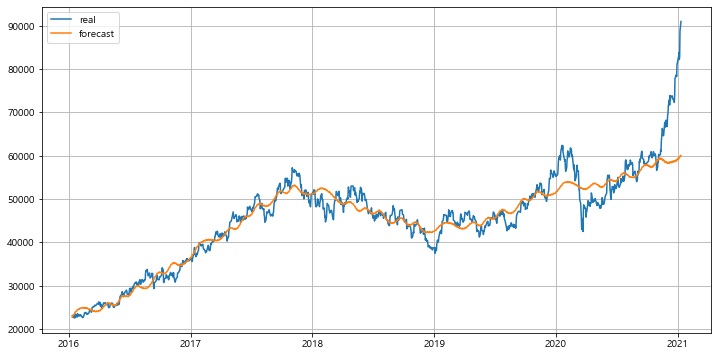

In [71]:
# 왜 여러요소를 제외한 차트만 가지고 주가를 예측하기 불가능한지 보여주는 이유
plt.figure(figsize=(12,6))
plt.plot(SSE.index, SSE['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()